# FRETBursts - ns-ALEX example

*This notebook is part of a [tutorial series](https://github.com/tritemio/FRETBursts_notebooks) for the [FRETBursts](http://tritemio.github.io/FRETBursts/) burst analysis software.*

## Loading FRETBursts

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6+22.g45c80d4).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
%matplotlib inline

In [3]:
sns = init_notebook()

In [4]:
def linplot16(values, figsize=(6, 4), ax=None, title=None, **plt_kws):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    plt_kws.setdefault('marker', 'o')
    plt_kws.setdefault('lw', 0)
    ax.plot(values,'o')
    ax.set_ylim(0)
    ax.set_xticks(range(16))
    ax.set_xlabel('Spot')
    if title is not None:
        ax.set_title(title, va='bottom')

## Selecting a data file

Alternatively you can use an open-file dialog in order to select a data file:

In [5]:
from pathlib import Path

In [6]:
dir = r'E:\Data\Antonio\data\POLIMI-TCSPC-16ch/2015-08-28'

filename = dir + '/DCR_2.hdf5'

In [7]:
fnlist = [f.name for f in Path(dir).glob('*.hdf5')]
fnlist

['DCR_2.hdf5',
 'dsDNA-A550-100pM_Cyl200_Em150-100_3.hdf5',
 'dsDNA-A550-1nM-NDwheel-1stop_1.hdf5',
 'dsDNA-A550-25pM-new-sample_Cyl200_Em150-100-reall3_12.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reall3_10.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7_cache.hdf5',
 'dsDNA-A550-50pM_Cyl200_Em150-100-reallign_5.hdf5',
 'dsDNA-A550-50pM_Cyl200_Em150-100_4.hdf5',
 'IRF-glass-air-100mW_8.hdf5',
 'IRF-glass-air-reall3-100mW_14.hdf5',
 'IRF-glass-TE50-surface-NDwheel-stop0-reall3-100mW_17.hdf5',
 'IRF-glass-TE50-surface-NDwheel-stop1-reall3-100mW_15.hdf5',
 'IRF-glass-TE50-surface-noLP-100mW_9.hdf5']

In [8]:
import os
if os.path.isfile(filename):
    print("Perfect, I found the file!")
else:
    print("Sorry, I can't find the file:\n%s" % filename)

Perfect, I found the file!


## Load the selected file

Here we load the file and we set the alternation parameters:

In [9]:
d = loader.photon_hdf5(filename)

In [10]:
print(d.description.decode())

POLIMI-TCSPC module 16-CH [Pos1: 0403FE6A (ch 1-8), Pos3: 0403F16A (ch 9-16)]; Manta 0403DAE6.


In [11]:
d.time_min, d.time_max, d.acquisition_duration

(6.1767475999999997, 487.93292829999996, array(481.75618069999996))

In [12]:
dcr = d.ph_data_sizes / d.acquisition_duration
dcr

array([ 3019.83463479,   175.43521679,   545.98988147,  1903.92160339,
        1864.38085484,   386.70183687,  1070.16582382,  1019.13586098,
          44.36684127,    35.56155725,   249.95631571,   385.86738987,
         124.65019113,   144.03344011,  3648.88728038,  3261.87408269])

In [13]:
import pandas as pd

In [14]:
DCR = pd.DataFrame(dcr, columns=('DCR',)).round(1)
DCR.index.name = 'CH'
DCR

,DCR
CH,
0,3019.8
1,175.4
2,546.0
3,1903.9
4,1864.4
...,...
11,385.9
12,124.7
13,144.0


In [15]:
DCR.to_csv('data/DCR_2015-08-28.csv')

In [16]:
pd.read_csv('data/DCR_2015-08-28.csv', index_col=0)

,DCR
CH,
0,3019.8
1,175.4
2,546.0
3,1903.9
4,1864.4
...,...
11,385.9
12,124.7
13,144.0


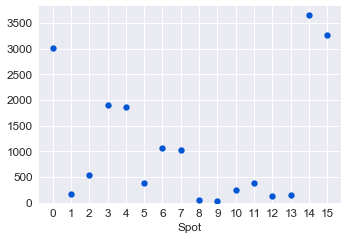

In [17]:
linplot16(DCR)